In [43]:
import pandas as pd
import numpy as np

from sklearn.metrics import adjusted_mutual_info_score as AMI
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt


In [70]:
clus13 = pd.read_csv("output/cluster_13_111023.csv", index_col=0)
clusagg = pd.read_csv("output/cluster_stepmix_aggregate_010524.csv", index_col=0)
clusmulti = pd.read_csv("output/cluster_13_stepmix_multi_112923.csv", index_col=0)
clus13_na = pd.read_csv("output/cluster_13_ambiguousNaN_111023.csv", index_col=0)
clus_leo = pd.read_csv("../clusterings/leo/d2_pca_additive_hdbscan_sil_17_6031_with_ids.csv")

tsne_comps = pd.read_csv("output/tsne_components.csv", index_col=0)

In [76]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [9]:
AMI(clus13.cluster, clusagg.cluster)

0.7017100817253679

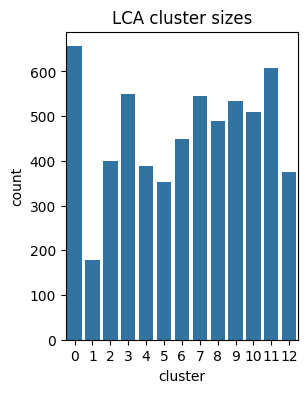

In [39]:
# plot value_counts
#clus13.plot.hist()
plt.figure(figsize=(3, 4))
sns.countplot(x=clus13['cluster'])
plt.title("LCA cluster sizes")
plt.savefig("figs/clustersize_13.pdf")

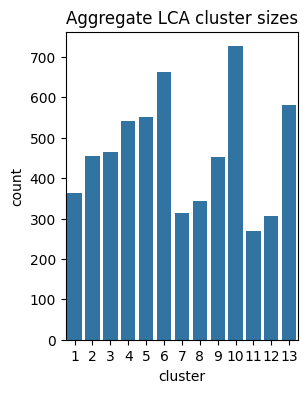

In [40]:
plt.figure(figsize=(3, 4))
sns.countplot(x=clusagg['cluster'])
plt.title("Aggregate LCA cluster sizes")
plt.savefig("figs/clustersize_agg.pdf")

In [54]:
clus13_na.cluster.isna().sum()

108

In [59]:
nas = clus13[clus13_na.cluster.isna()]

In [68]:
(nas.cluster.value_counts()/clus13.cluster.value_counts()).median()

0.016623687603610243

In [74]:
tsne_comps['clus_leo'] = clus_leo['cluster']

<Axes: title={'center': 't-SNE Clustering'}, xlabel='tsne_1', ylabel='tsne_2'>

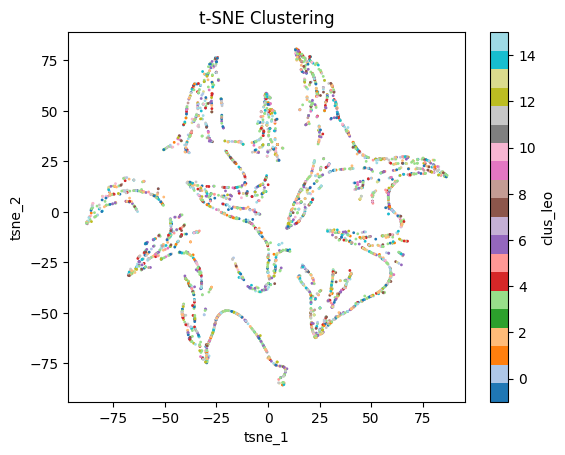

In [75]:
tsne_comps.plot.scatter(x='tsne_1', y='tsne_2', c='clus_leo', colormap='tab20', title= "t-SNE Clustering",
                    s=1)

In [ ]:
result = df.groupby('cluster')['clusold'].value_counts().unstack(fill_value=0)


In [77]:
ensemble = pd.cbind()

NameError: name 'clusters' is not defined